In [62]:
import matplotlib.pyplot as plt

# Initialize the dictionary to store the data
data = {}
time_data = {}
currentFarmer = ""
farmer_names = []

# Open the text file and loop through each line
time_step = 0
with open('output.txt', 'r') as f:
    farmers = set()
    for line in f:
        #we're starting a new time step
        if 'Pasture' in line:
            pasture_health = line.split(" ")[-1]
            time_data[time_step] = {'pasture_health': float(pasture_health)}
            time_step += 2 #seconds
        elif 'Cows for' in line:
            farmer = line.split(" ")[3].split("@")[0]
            farmers.add(farmer)
            if farmer not in farmer_names:
                farmer_names.append(farmer)
                
            if time_step not in data:
                data[time_step] = {} # initialize cow counts for this time step
            data[time_step][farmer] = 0 # initialize cow count for this farmer
        elif 'Cow with' in line:
            data[time_step][farmer] += 1
    # for line in f:
    #     #we're starting a new time step
    #     if 'Pasture' in line:
    #         pasture_health = line.split(" ")[-1]
    #         time_data[time_step] = {'pasture_health': float(pasture_health)}
    #         time_step += 2 #seconds
    #     elif 'Cows for' in line:
    #         #find FarmerAgentX in the string and get the X value
    #         #test = {"2" : [('FarmerAgent1',0,0), ('FarmerAgent2',0,0)], "4" : [('FarmerAgent1',0,0), ('FarmerAgent2',0,0)]}
    #         farmer = line.split(" ")[3].split("@")[0]
    #         currentFarmer = farmer
    #         data[time_step] = {currentFarmer : 0}
    #     elif 'Cow with' in line:
    #         data[time_step][currentFarmer] += 1


In [63]:
#replacing None values
data
#iterate data and see if every farmer_names is in the line
for time_step in data:
    for farmer_name in farmer_names:
        if farmer_name not in data[time_step]:
            data[time_step][farmer_name] = 0

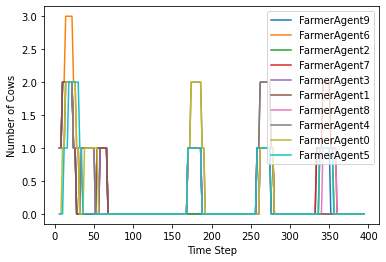

In [64]:
farmer_data = {}
for farmer in farmer_names:
    farmer_data[farmer] = []

# Loop through the dictionary and append data for each farmer to the corresponding list
for time_step, farmer_counts in data.items():
    for farmer in farmer_names:
        farmer_data[farmer].append(farmer_counts.get(farmer, 0))

# Plot the data using Matplotlib
for farmer in farmer_names:
    plt.plot(list(data.keys()), farmer_data[farmer], label=farmer)

# Add labels and legend
plt.xlabel('Time Step')
plt.ylabel('Number of Cows')
plt.legend()

# Show the plot
plt.show()

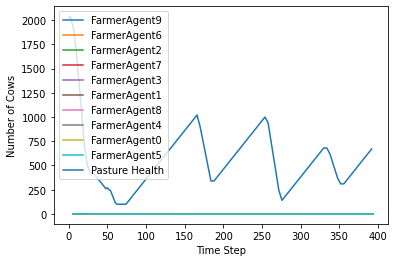

In [65]:
x2 = list(time_data.keys())
y2 = [list(time_data[k].values())[0] for k in x2]

# Plot the data using Matplotlib
for farmer in farmer_names:
    plt.plot(list(data.keys()), farmer_data[farmer], label=farmer)
plt.plot(x2, y2, label='Pasture Health')

# Add labels and legend
plt.xlabel('Time Step')
plt.ylabel('Number of Cows')
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


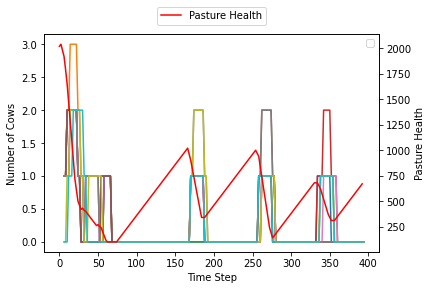

In [66]:
fig, ax1 = plt.subplots()
for farmer in farmer_names:
    plt.plot(list(data.keys()), farmer_data[farmer])
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Number of Cows')
ax1.legend()

ax2 = ax1.twinx()
x2 = list(time_data.keys())
y2 = [list(time_data[k].values())[0] for k in x2]
ax2.plot(x2, y2, label='Pasture Health', color='red')
ax2.set_ylabel('Pasture Health')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

# Show the plot
plt.show()